## 160-链表相交
#### 易错点：相交的定义：

相交是指两个链表共享同一个节点对象（内存地址相同）！！！

不是指节点的值相同

使用 pointerA != pointerB 比较的是对象引用，不是值。

### ！！！核心的判断逻辑是：
两个链表A,B如果时相交的，则两个指针对应两个链，这两指针在走两个链和(A+B/B+A)会同时到达相交节点

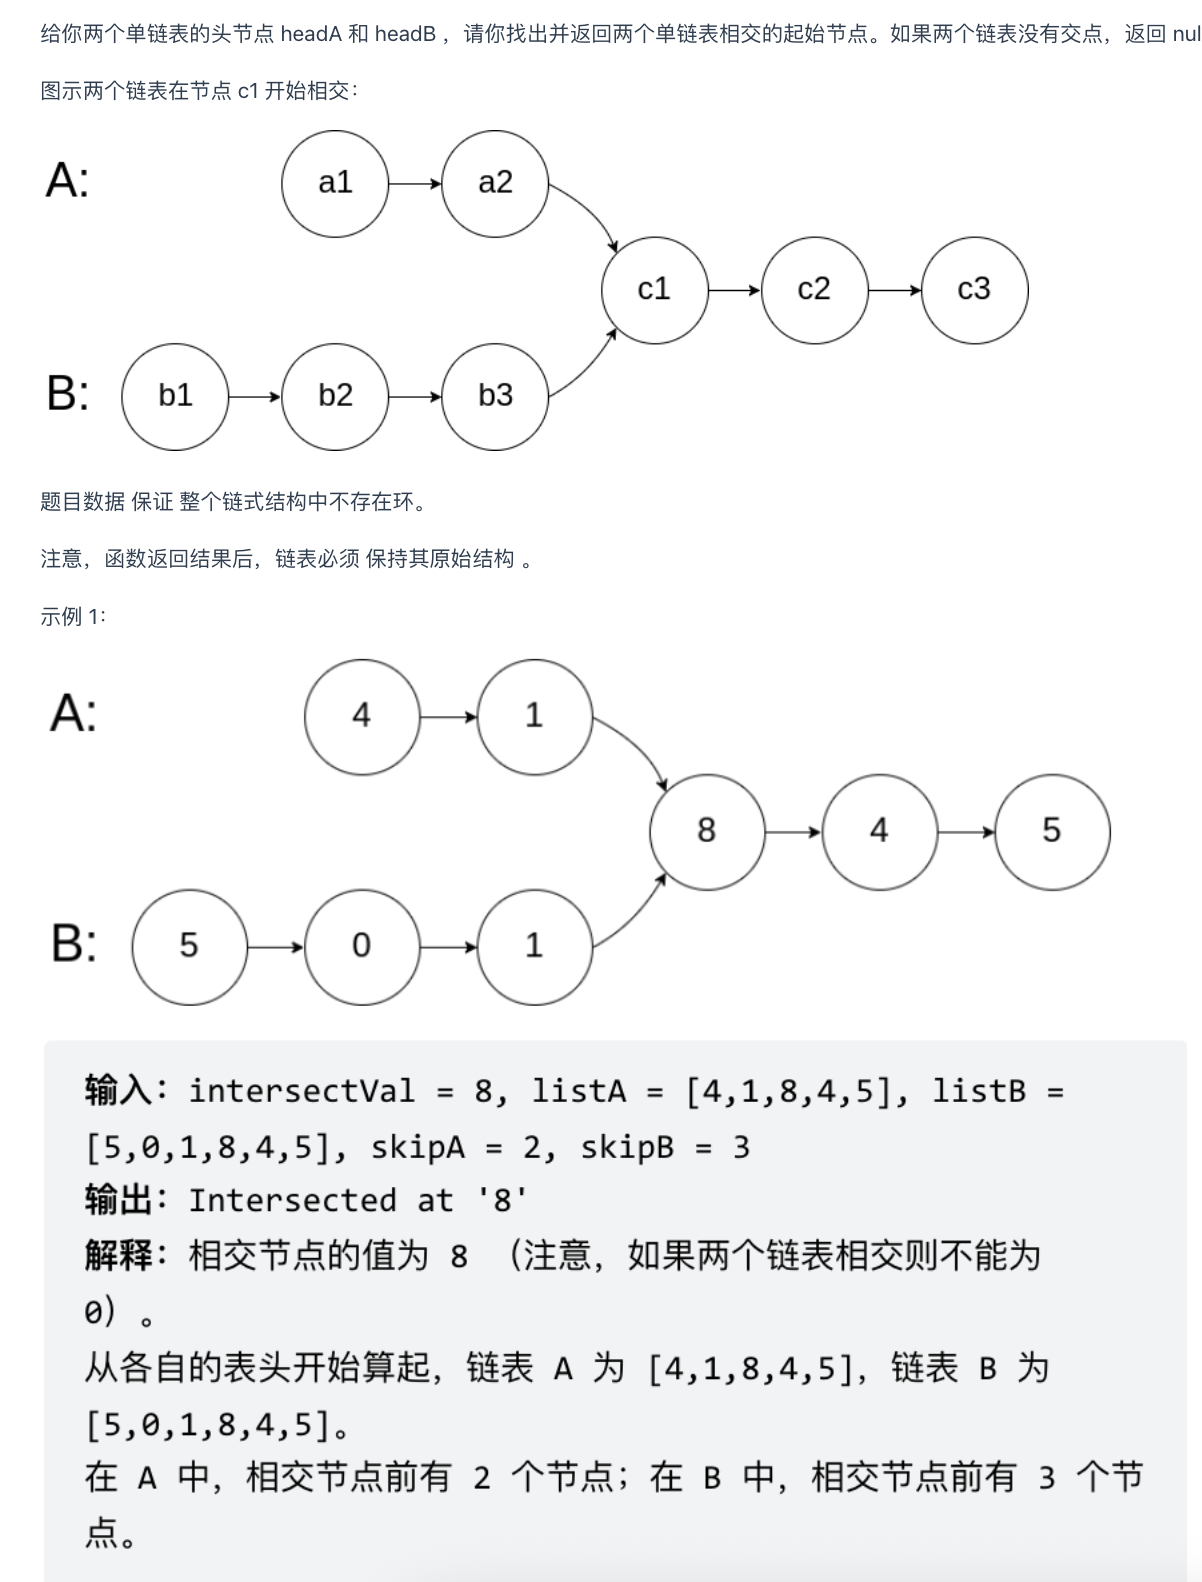
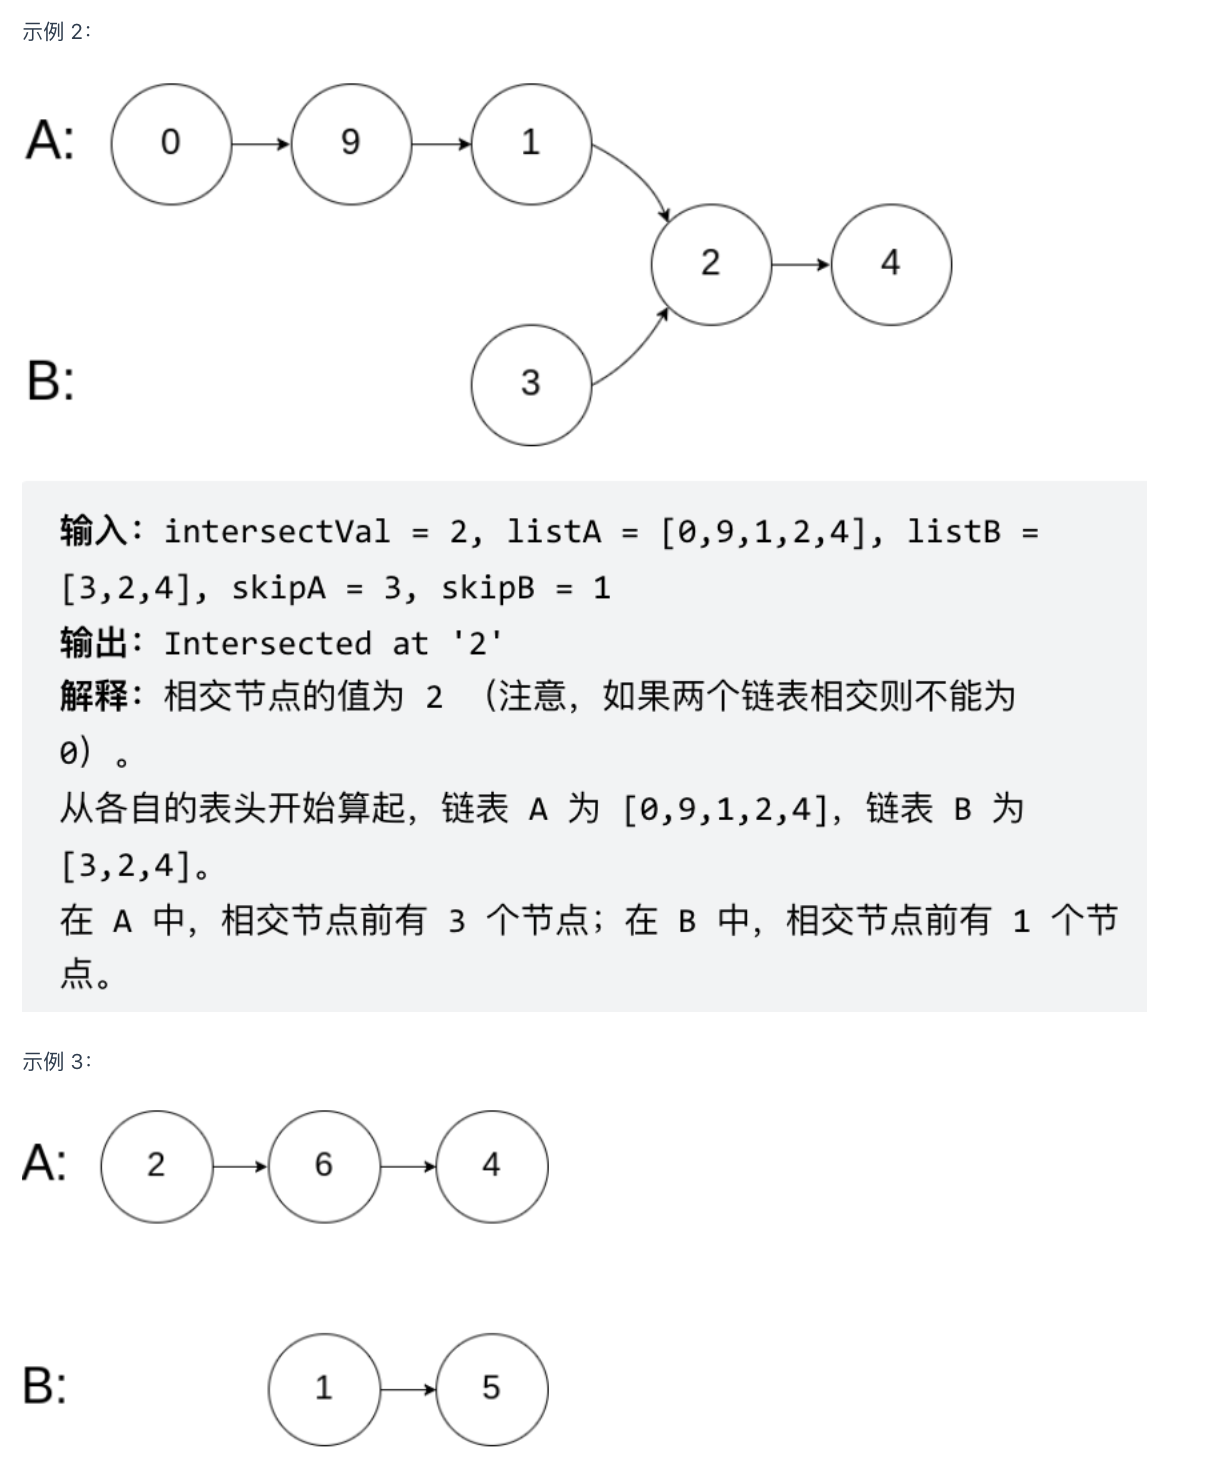
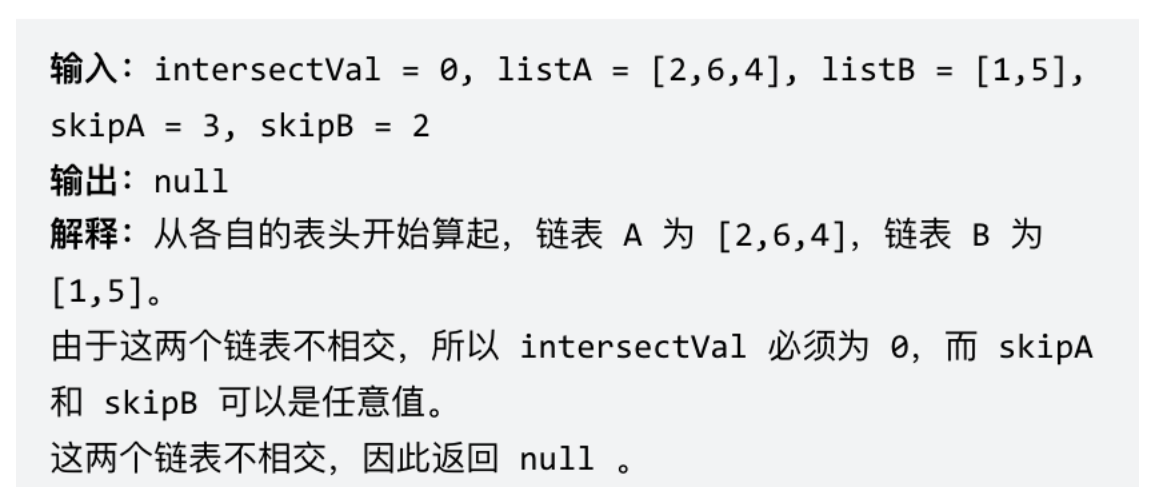

In [3]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None

class Solution:
    def getIntersectionNode(self, headA: ListNode, headB: ListNode) -> ListNode:
        """
        找到两个链表的相交节点
        思路：双指针法
        - 指针pointerA从headA开始，遍历完链表A后，从headB开始遍历
        - 指针pointerB从headB开始，遍历完链表B后，从headA开始遍历
        - 如果两个链表相交，两个指针会在相交点相遇（判断的是节点对象是否相同，不是val值）
        - 如果不相交，两个指针都会走到None
        
        重要：相交是指节点的引用相同，即同一个节点对象，不是节点的值相同
        """
        # 边界条件检查
        #如果任意一个链表为空，不可能相交，直接返回None
        # headA为None表示链表A是空链表
        # headB为None表示链表B是空链表
        # 空链表无法和任何链表相交
        # if not headA or not headB:
        if headA is None or headB is None:
            return None
        
        pointerA = headA
        pointerB = headB
        
        # 两个指针会在相交的节点对象处相遇，或者都为None
        # 这里比较的是节点对象的引用，不是节点的值
        while pointerA != pointerB:
            # pointerA遍历完A后去遍历B
            if pointerA is not None:
                pointerA = pointerA.next
            else:
                pointerA = headB
            
            # pointerB遍历完B后去遍历A
            if pointerB is not None:
                pointerB = pointerB.next
            else:
                pointerB = headA
        
        return pointerA


if __name__ == '__main__':
    solution = Solution()
    
    # 测试用例1: 有相交（节点对象相同）
    # listA: 4 -> 1 -> 8 -> 4 -> 5
    # listB: 5 -> 6 -> 1 -> 8 -> 4 -> 5
    # 从节点8开始相交（同一个节点对象）
    
    # 创建相交部分（关键：这是同一组节点对象）
    intersect = ListNode(8)
    intersect.next = ListNode(4)
    intersect.next.next = ListNode(5)
    
    # 创建链表A: 4 -> 1 -> 相交部分
    headA = ListNode(4)
    headA.next = ListNode(1)
    headA.next.next = intersect  # 指向同一个节点对象
    
    # 创建链表B: 5 -> 6 -> 1 -> 相交部分
    headB = ListNode(5)
    headB.next = ListNode(6)
    headB.next.next = ListNode(1)
    headB.next.next.next = intersect  # 指向同一个节点对象
    
    result = solution.getIntersectionNode(headA, headB)
    print(f"测试用例1 - 相交节点值: {result.val if result else None}")  # 输出: 8
    print(f"测试用例1 - 是否找到相交节点: {result is intersect}")  # 输出: True（节点对象相同）
    
    
    # 测试用例2: 无相交
    # listA: 2 -> 6 -> 4
    # listB: 1 -> 5
    headA2 = ListNode(2)
    headA2.next = ListNode(6)
    headA2.next.next = ListNode(4)
    
    headB2 = ListNode(1)
    headB2.next = ListNode(5)
    
    result2 = solution.getIntersectionNode(headA2, headB2)
    print(f"\n测试用例2 - 相交节点值: {result2.val if result2 else None}")  # 输出: None
    
    
    # 测试用例3: 完全相同的链表（从头节点就相交）
    # listA和listB指向同一个链表对象
    headA3 = ListNode(1)
    headA3.next = ListNode(2)
    headA3.next.next = ListNode(3)
    
    result3 = solution.getIntersectionNode(headA3, headA3)
    print(f"\n测试用例3 - 相交节点值: {result3.val if result3 else None}")  # 输出: 1
    print(f"测试用例3 - 是否找到相交节点: {result3 is headA3}")  # 输出: True
    
    
    # 测试用例4: 节点值相同但不相交（重要：说明判断的是节点对象，不是值）
    # listA: 1 -> 2 -> 3
    # listB: 1 -> 2 -> 3
    # 虽然值相同，但是不同的节点对象
    headA4 = ListNode(1)
    headA4.next = ListNode(2)
    headA4.next.next = ListNode(3)
    
    headB4 = ListNode(1)  # 新创建的节点对象，虽然值也是1
    headB4.next = ListNode(2)  # 新创建的节点对象，虽然值也是2
    headB4.next.next = ListNode(3)  # 新创建的节点对象，虽然值也是3
    
    result4 = solution.getIntersectionNode(headA4, headB4)
    print(f"\n测试用例4 - 相交节点值: {result4.val if result4 else None}")  # 输出: None
    print("测试用例4说明: 虽然两个链表的节点值完全相同，但它们是不同的节点对象，所以不相交")

测试用例1 - 相交节点值: 8
测试用例1 - 是否找到相交节点: True

测试用例2 - 相交节点值: None

测试用例3 - 相交节点值: 1
测试用例3 - 是否找到相交节点: True

测试用例4 - 相交节点值: None
测试用例4说明: 虽然两个链表的节点值完全相同，但它们是不同的节点对象，所以不相交


In [1]:
#（版本一）求长度，同时出发

class ListNode:
    # 初始化函数，定义节点的值(val)和指向下一个节点的指针(next)
    def __init__(self, val=0, next=None):
        self.val = val    # 节点存储的数据
        self.next = next  # 指向下一个节点的指针，默认为 None
        
class Solution:
    def getIntersectionNode(self, headA: ListNode, headB: ListNode) -> ListNode:
        lenA, lenB = 0, 0
        cur = headA
        while cur:         # 求链表A的长度
            cur = cur.next 
            lenA += 1
        cur = headB 
        while cur:         # 求链表B的长度
            cur = cur.next 
            lenB += 1
        curA, curB = headA, headB
        if lenA > lenB:     # 让curB为最长链表的头，lenB为其长度
            curA, curB = curB, curA
            lenA, lenB = lenB, lenA 
        for _ in range(lenB - lenA):  # 让curA和curB在同一起点上（末尾位置对齐）
            curB = curB.next 
        while curA:         #  遍历curA 和 curB，遇到相同则直接返回
            if curA == curB:
                return curA
            else:
                curA = curA.next 
                curB = curB.next
        return None 